In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading returns data
price_data = pd.read_csv("/data/workspace_files/lazy_price_replication/all_ticker_prices.csv", index_col=0)
price_data['returns'] = price_data['Close'].pct_change()
price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data = price_data[abs(price_data['returns'])<90]

In [3]:
price_data

,Date,Open,High,Low,Close,Adj Close,Volume,ticker,returns
1,2008-01-03,219.699997,223.500000,209.000000,218.300003,20.185276,9130.0,RBCN,-0.006372
2,2008-01-04,215.000000,216.500000,201.000000,209.800003,19.399317,4930.0,RBCN,-0.038937
3,2008-01-07,210.000000,213.000000,200.399994,206.600006,19.103426,10940.0,RBCN,-0.015253
4,2008-01-08,211.899994,220.600006,210.699997,215.000000,19.880138,27220.0,RBCN,0.040658
5,2008-01-09,214.100006,230.500000,214.000000,229.500000,21.220890,5820.0,RBCN,0.067442
...,...,...,...,...,...,...,...,...,...
1505,2013-12-23,37.970001,38.549999,37.950001,38.439999,31.220364,6313200.0,ABT,0.015856
1506,2013-12-24,38.360001,38.450001,38.110001,38.189999,31.017303,2207600.0,ABT,-0.006504
1507,2013-12-26,38.220001,38.490002,38.200001,38.349998,31.147268,3655800.0,ABT,0.004190
1508,2013-12-27,38.520000,38.529999,38.230000,38.369999,31.163511,2705600.0,ABT,0.000522


In [4]:
import pandas as pd

# Assuming you have a DataFrame 'data' with columns 'Date', 'Close', 'ticker', 'year', 'returns'
data = price_data
# Step 1: Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Extract year and month from the 'Date' column
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month

# Step 3: Filter the data to only include February (month == 2)
data_feb_end = data[data['month'] == 2].copy()

# Step 4: Sort values by 'ticker' and 'Date' to make sure calculations are ordered correctly
data_feb_end.sort_values(by=['ticker', 'Date'], inplace=True)

# Step 5: Keep only the last trading day of February for each ticker and year
data_feb_end_last_day = data_feb_end.groupby(['ticker', 'year']).tail(1).copy()

# Step 6: Shift the closing price to align February end with the next year’s February end for each ticker
data_feb_end_last_day['feb_end_next_year'] = data_feb_end_last_day.groupby('ticker')['Close'].shift(-1)

# Step 7: Calculate the yearly return from February end to the next year’s February end
data_feb_end_last_day['yearly_return'] = (data_feb_end_last_day['feb_end_next_year'] - data_feb_end_last_day['Close']) / data_feb_end_last_day['Close']

# Step 8: Drop rows where 'feb_end_next_year' is NaN (the last year for which there's no next year's February)
data_feb_end_last_day = data_feb_end_last_day.dropna(subset=['feb_end_next_year'])

# Step 9: Keep only the relevant columns
yearly_returns = data_feb_end_last_day[['ticker', 'year', 'Close', 'feb_end_next_year', 'yearly_return']]

# Display the result
print(yearly_returns)
#

     ticker  year      Close  feb_end_next_year  yearly_return
40        A  2008  21.895565           9.921316      -0.546880
291       A  2009   9.921316          22.503576       1.268205
542       A  2010  22.503576          30.100143       0.337572
795       A  2011  30.100143          31.201717       0.036597
1048      A  2012  31.201717          29.670959      -0.049060
...     ...   ...        ...                ...            ...
40       ZZ  2008   9.110000           0.800000      -0.912184
291      ZZ  2009   0.800000           3.460000       3.325000
542      ZZ  2010   3.460000           2.880000      -0.167630
795      ZZ  2011   2.880000           1.720000      -0.402778
1048     ZZ  2012   1.720000           2.180000       0.267442

[3356 rows x 5 columns]


In [5]:
data_sim_sent = pd.read_csv('/data/workspace_files/lazy_price_replication/10k_final_with_ticker_name_filtered_w_similarity_and_sentiment.csv')
data_sim_sent

,Unnamed: 0,cik,report_period_end_date2007,file_date2007,statement2007,report_period_end_date2008,file_date2008,statement2008,report_period_end_date2009,file_date2009,...,min_edit_distance_similarity_2008_to_2009,min_edit_distance_similarity_2009_to_2010,min_edit_distance_similarity_2010_to_2011,min_edit_distance_similarity_2011_to_2012,sentiment2007,sentiment2008,sentiment2009,sentiment2010,sentiment2011,sentiment2012
0,0,1800,20071231,20080219,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20081231,20090220,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20091231,20100219,...,0.307008,0.513502,0.540668,0.348060,0.121238,0.124539,0.391319,0.209631,0.130986,0.093917
1,2,2178,20071231,20080331,Item 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20081231,20090324,Item 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20091231,20100323,...,0.417274,0.408893,0.308048,0.293831,0.350000,0.050000,-0.100000,0.300000,0.050000,0.170000
2,3,3453,20071231,20080228,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20081231,20090227,ITEM 7. MANAGEMENTS DISCUSSION AND ANALYSIS OF...,20091231,20100226,...,0.404420,0.374144,0.345286,0.551090,0.200000,0.268524,0.154646,0.200000,0.180894,-0.067076
3,4,3499,20071231,20080225,Item 7. Managements Discussion and Analysis of...,20081231,20090223,Item 7. Managements Discussion and Analysis of...,20091231,20100222,...,0.489073,0.415982,0.453388,0.337923,0.030000,-0.200000,-0.200000,-0.200000,0.200000,-0.100000
4,5,3545,20070831,20071114,Item 7. Managements Discussion and Analysis of...,20080930,20081215,Item 7. Managements Discussion and Analysis of...,20090930,20091214,...,0.446751,0.544851,1.108925,0.717271,-0.150000,-0.100759,-0.241107,-0.238509,0.333335,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,1200,1401564,20071231,20080331,Item 7. Managements Discussion and Analysis of...,20081231,20090310,Item 7. Managements Discussion and Analysis of...,20091231,20100311,...,0.419768,0.281468,0.249981,0.331602,0.142722,-0.022510,0.081454,0.175144,0.172564,0.145069
721,1201,1403161,20070930,20071221,Item 7 Managements Discussion and Analysis of ...,20080930,20081121,Item 7 Managements Discussion and Analysis of ...,20090930,20091120,...,0.660254,0.349052,0.325162,0.763887,0.147093,0.214760,0.131843,0.235606,0.434432,-0.449011
722,1205,1406587,20071229,20080304,Item 7. Managements Discussion and Analysis of...,20081231,20090305,Item 7. Managements Discussion and Analysis of...,20091231,20100303,...,0.514936,0.391496,0.406814,0.456269,0.050000,-0.200000,0.200000,0.189922,0.131045,0.298571
723,1207,1408534,20071231,20080331,Item 7 Managements Discussion and Analysis of ...,20081231,20090331,Item 7 Managements Discussion and Analysis of ...,20091231,20100331,...,0.289336,0.349628,0.440325,0.310063,0.532860,-0.012300,0.339242,0.130007,0.328891,0.248239


In [6]:
cols = [col for col in data_sim_sent.columns if 'similarity' in col]
cols.append('ticker')
data = data_sim_sent[cols]

prefixes = ['consine_similarity', 'jaccard_similarity', 'min_edit_distance_similarity']

# Melt the DataFrame to reshape it from wide to long format
melted_df = pd.melt(data, id_vars=['ticker'], var_name='similarity', value_name='value')

# Extract year and similarity type from the column name
melted_df['year'] = melted_df['similarity'].str.extract(r'(\d{4})').astype(int)
melted_df['similarity_type'] = melted_df['similarity'].str.extract(r'(^[a-zA-Z_]+)')

# Pivot the DataFrame to get separate columns for each similarity measure
final_df = melted_df.pivot_table(index=['ticker', 'year'], columns='similarity_type', values='value').reset_index()

# Rename the columns to a cleaner format
final_df.columns.name = None
final_df.rename(columns={'consine_similarity': 'cosine_similarity',
                         'min_edit_distance_similarity': 'min_edit_similarity'}, inplace=True)

# Display the final DataFrame
print(final_df)

     ticker  year  consine_similarity_  jaccard_similarity_  \
0         A  2007             0.985560             0.696571   
1         A  2008             0.971962             0.646277   
2         A  2009             0.978742             0.675712   
3         A  2010             0.984509             0.726276   
4         A  2011             0.982049             0.689987   
...     ...   ...                  ...                  ...   
3460     ZZ  2007             0.989607             0.723838   
3461     ZZ  2008             0.988960             0.719824   
3462     ZZ  2009             0.987752             0.736493   
3463     ZZ  2010             0.988746             0.766936   
3464     ZZ  2011             0.986773             0.767979   

      min_edit_distance_similarity_  
0                          0.421220  
1                          0.553667  
2                          0.455184  
3                          0.445068  
4                          0.491005  
...            

In [7]:
merged_df = pd.merge(yearly_returns, final_df, on=['ticker', 'year'], how='inner')
merged_df

,ticker,year,Close,feb_end_next_year,yearly_return,consine_similarity_,jaccard_similarity_,min_edit_distance_similarity_
0,A,2008,21.895565,9.921316,-0.546880,0.971962,0.646277,0.553667
1,A,2009,9.921316,22.503576,1.268205,0.978742,0.675712,0.455184
2,A,2010,22.503576,30.100143,0.337572,0.984509,0.726276,0.445068
3,A,2011,30.100143,31.201717,0.036597,0.982049,0.689987,0.491005
4,AACC,2008,9.750000,3.350000,-0.656410,0.964791,0.693878,0.589344
...,...,...,...,...,...,...,...,...
2678,ZUMZ,2011,26.070000,31.420000,0.205217,0.992775,0.790205,0.284525
2679,ZZ,2008,9.110000,0.800000,-0.912184,0.988960,0.719824,0.457755
2680,ZZ,2009,0.800000,3.460000,3.325000,0.987752,0.736493,0.363532
2681,ZZ,2010,3.460000,2.880000,-0.167630,0.988746,0.766936,0.388361


In [123]:
# Initialize an empty list to store results
portfolio_returns = []
long_tickers = {}
short_tickers = {}

# Step 1: Group by year and iterate over each group
for year, group in merged_df.groupby('year'):
    # Step 2: Sort data by similarity measure (choose jaccard_similarity_ for this example)
    data_sorted = group.sort_values(by='jaccard_similarity_', ascending=True)

    # Step 3: Define the percentage cutoff for long and short positions
    top_cutoff = 0.20  # Top 20% for long positions
    bottom_cutoff = 0.20  # Bottom 20% for short positions

    # Step 4: Define number of stocks in long and short positions
    n_stocks = len(data_sorted)
    n_long = int(top_cutoff * n_stocks)
    n_short = int(bottom_cutoff * n_stocks)

    # Step 5: Create Long and Short Portfolios
    long_portfolio = data_sorted.head(n_long)
    short_portfolio = data_sorted.tail(n_short)

    # Step 6: Calculate Average Returns for Long and Short portfolios
    long_return = long_portfolio['yearly_return'].mean()
    short_return = short_portfolio['yearly_return'].mean()

    # Step 7: Long-Short Portfolio Return
    long_short_return = long_return - short_return

    # Store the result for this year
    portfolio_returns.append({
        'year': year,
        'long_portfolio': long_portfolio,
        'short_portfolio': short_portfolio,
        'long_return': long_return,
        'short_return': short_return,
        'long_short_return': long_short_return,
        'long_portfolio_tickers': long_portfolio['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio['ticker'].tolist()
    })

    long_tickers[year] = long_portfolio['ticker'].tolist()
    short_tickers[year] = short_portfolio['ticker'].tolist()


# Create a DataFrame from the portfolio returns
portfolio_df = pd.DataFrame(portfolio_returns)

# Output the results
for index, row in portfolio_df.iterrows():
    print(f"\nYear: {row['year']}")
    print(f"Long portfolio tickers: {row['long_portfolio_tickers']}")
    print(f"Short portfolio tickers: {row['short_portfolio_tickers']}")
    print(f"Long portfolio average return: {row['long_return']:.2%}")
    print(f"Short portfolio average return: {row['short_return']:.2%}")
    print(f"Long-Short portfolio return: {row['long_short_return']:.2%}")


Year: 2008
Long portfolio tickers: ['ANIK', 'PRC', 'UEIC', 'BX', 'SNPS', 'RBCAA', 'ALGN', 'ANF', 'DRRX', 'PAA', 'KOSS', 'CLFD', 'LCNB', 'TFSL', 'SBH', 'EXAS', 'LSBK', 'WGO', 'HWKN', 'TKO', 'NL', 'AFSI', 'NFX', 'TLB', 'CRS', 'COLB', 'NSYS', 'RSG', 'FCL', 'FORR', 'LTRE', 'HITK', 'CVR', 'ALOG', 'SHOO', 'CAAS', 'SIGI', 'BCSB', 'MYGN', 'ARTNA', 'CSPI', 'BSET', 'WSTL', 'COHR', 'FLWS', 'KBR', 'SCMP', 'CENX', 'AIRT', 'CALD', 'FNLC', 'GORO', 'DJCO', 'CEBK', 'CTAS', 'FMC', 'HURC', 'GLT', 'IBKR', 'FRME', 'ATRC', 'APT', 'ORRF', 'VALU', 'GBX', 'MELI', 'ENS', 'CQP', 'CYMI', 'FSLR', 'HNNA', 'VRTX', 'SAH', 'NDSN', 'AEIS', 'CHCI', 'SMID', 'PLPC', 'FLXS', 'JCTCF', 'NRIM', 'SALM', 'NTSC', 'BCRX', 'CSE', 'EIHI', 'FFCH', 'MAXY', 'KO', 'TOFC', 'RVSB', 'CROX', 'JVA', 'KLIC', 'PENN', 'ELS', 'ALGT', 'ITIC', 'A', 'GSAT', 'INOC', 'MCRI', 'TDW', 'DTE', 'MMLP', 'HFWA', 'DAL', 'FOLD', 'RAVE', 'VSEC', 'AZO', 'WNC', 'AUBN', 'BCBP', 'AFL', 'VRSN', 'MXC', 'MORN', 'NKSH', 'ADC', 'SDBT', 'ALCO', 'INTX', 'XOMA', 'LUNA', 


Year: 2008
Long portfolio average return: -44.84%
Short portfolio average return: -41.22%
Long-Short portfolio return: -3.62%

Year: 2009
Long portfolio average return: 106.04%
Short portfolio average return: 95.57%
Long-Short portfolio return: 10.47%

Year: 2010
Long portfolio average return: 35.02%
Short portfolio average return: 32.35%
Long-Short portfolio return: 2.68%

Year: 2011
Long portfolio average return: 26.78%
Short portfolio average return: 4.84%
Long-Short portfolio return: 21.94%


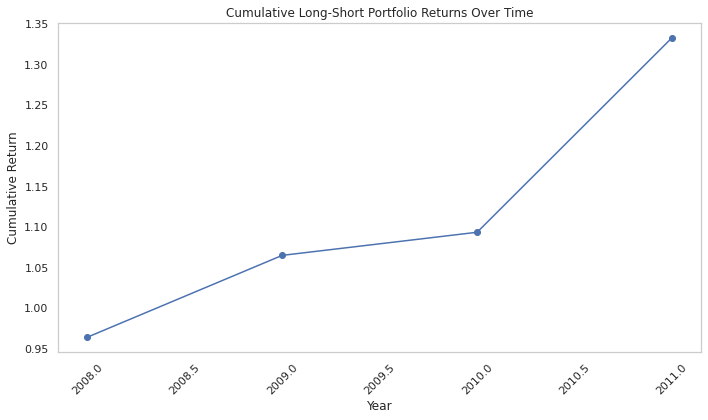

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store results
portfolio_returns = []
long_tickers = {}
short_tickers = {}

# Step 1: Group by year and iterate over each group
for year, group in merged_df.groupby('year'):
    # Step 2: Sort data by similarity measure (choose jaccard_similarity_ for this example)
    data_sorted = group.sort_values(by='jaccard_similarity_', ascending=True)

    # Step 3: Define the percentage cutoff for long and short positions
    top_cutoff = 0.20  # Top 20% for long positions
    bottom_cutoff = 0.20  # Bottom 20% for short positions

    # Step 4: Define number of stocks in long and short positions
    n_stocks = len(data_sorted)
    n_long = int(top_cutoff * n_stocks)
    n_short = int(bottom_cutoff * n_stocks)

    # Step 5: Create Long and Short Portfolios
    long_portfolio = data_sorted.head(n_long)
    short_portfolio = data_sorted.tail(n_short)

    # Step 6: Calculate Average Returns for Long and Short portfolios
    long_return = long_portfolio['yearly_return'].mean()
    short_return = short_portfolio['yearly_return'].mean()

    # Step 7: Long-Short Portfolio Return
    long_short_return = long_return - short_return

    # Store the result for this year
    portfolio_returns.append({
        'year': year,
        'long_portfolio': long_portfolio,
        'short_portfolio': short_portfolio,
        'long_return': long_return,
        'short_return': short_return,
        'long_short_return': long_short_return,
        'long_portfolio_tickers': long_portfolio['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio['ticker'].tolist()
    })

    long_tickers[year] = long_portfolio['ticker'].tolist()
    short_tickers[year] = short_portfolio['ticker'].tolist()

# Create a DataFrame from the portfolio returns
portfolio_df = pd.DataFrame(portfolio_returns)

# Calculate cumulative returns
portfolio_df['cumulative_long_short_return'] = (1 + portfolio_df['long_short_return']).cumprod()

# Plotting cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['year'], portfolio_df['cumulative_long_short_return'], marker='o', linestyle='-')
plt.title('Cumulative Long-Short Portfolio Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Output the results
for index, row in portfolio_df.iterrows():
    print(f"\nYear: {row['year']}")
    #print(f"Long portfolio tickers: {row['long_portfolio_tickers']}")
    #print(f"Short portfolio tickers: {row['short_portfolio_tickers']}")
    print(f"Long portfolio average return: {row['long_return']:.2%}")
    print(f"Short portfolio average return: {row['short_return']:.2%}")
    print(f"Long-Short portfolio return: {row['long_short_return']:.2%}")


Year: 2008
Long portfolio average return: -47.43%
Short portfolio average return: -41.96%
Long-Short portfolio return: -5.46%

Year: 2009
Long portfolio average return: 103.60%
Short portfolio average return: 88.32%
Long-Short portfolio return: 15.28%

Year: 2010
Long portfolio average return: 34.01%
Short portfolio average return: 20.92%
Long-Short portfolio return: 13.09%

Year: 2011
Long portfolio average return: 25.23%
Short portfolio average return: -0.16%
Long-Short portfolio return: 25.39%

Adjusted Strategy Long and Short Tickers by Year:
{'2007 to 2008': ['ITIC', 'COLB', 'UEIC', 'LVS', 'PDFS', 'HURN', 'DUF', 'CAC', 'PATK', 'CLFD', 'STEI', 'TGLO', 'BKF', 'THS', 'MAC', 'JCTCF', 'ORA', 'PRC', 'SBH', 'AMED', 'IVAC', 'NKTR', 'LTC', 'GLT', 'AEIS', 'COI', 'DJCO', 'MTLI', 'GORO', 'TRC', 'VRSN', 'RSG', 'CRS', 'RAVE', 'CVR', 'CENX', 'NSIT', 'ALCO', 'NTSC', 'PAA', 'BYD', 'ROL', 'ABAX', 'FOR', 'TKO', 'NUE', 'PSS', 'CROX', 'AIRT', 'QCRH', 'CAAS', 'BBOX', 'CSPI', 'DHIL', 'WGO', 'TFX', 'STL

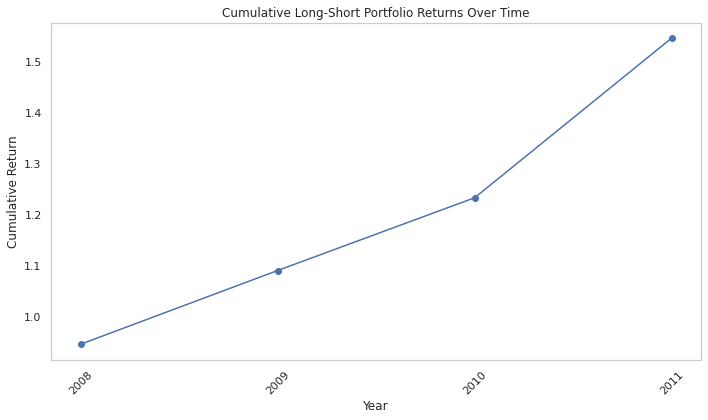

In [127]:

# Define the periods of interest (2007-2008, 2008-2009, 2009-2010, and 2010-2011)
periods = [
    ('2007', '2008'),
    ('2008', '2009'),
    ('2009', '2010'),
    ('2010', '2011')
]

# Define the threshold for a big increase in sentiment
big_increase_threshold = 0.5  # Adjust this value as necessary

# Assuming you have a DataFrame called 'returns_data' that contains returns for multiple years
# Let's say 'returns_data' has columns: ['ticker', 'year', 'yearly_return']

# Initialize dictionaries to store long and short tickers per year for each strategy
adjusted_long_tickers = {}
adjusted_short_tickers = {}
sentiment_long_tickers = {}
sentiment_short_tickers = {}

# Store portfolio returns for the adjusted strategy
adjusted_portfolio_returns = []

# Iterate over each period to calculate the adjusted portfolio returns
for start_year, end_year in periods:
    
    # Step 1: Filter the returns data to get the returns for the end year of the period
    returns_period = merged_df[merged_df['year'] == int(end_year)]
    
    # Step 2: Merge the returns data for the end year with the main dataset based on 'ticker'
    data_sent_period = data_sim_sent.merge(returns_period[['ticker', 'yearly_return']], on='ticker', how='left')

    # Step 3: Sort data by cosine similarity for the specific period (e.g., consine_similarity_2007_to_2008)
    cosine_column = f'consine_similarity_{start_year}_to_{end_year}'
    jaccard_column = f'jaccard_similarity_{start_year}_to_{end_year}'
    sentiment_column_start = f'sentiment{start_year}'
    sentiment_column_end = f'sentiment{end_year}'

    # Sort the data for the period
    data_sorted_adjusted = data_sent_period.sort_values(by=jaccard_column, ascending=True)
    data_sorted_adjusted = data_sorted_adjusted.dropna()
    # Step 4: Define the percentage cutoff for long and short positions
    top_cutoff = 0.20  # Top 20% for long positions
    bottom_cutoff = 0.20  # Bottom 20% for short positions

    # Step 5: Define number of stocks in long and short positions
    n_stocks_adjusted = len(data_sorted_adjusted)
    n_long_adjusted = int(top_cutoff * n_stocks_adjusted)
    n_short_adjusted = int(bottom_cutoff * n_stocks_adjusted)

    # Step 6: Create Long Portfolio for the adjusted strategy
    long_portfolio_adjusted = data_sorted_adjusted.head(n_long_adjusted)

    # Step 7: Apply the sentiment filter only for 2007 to 2008
    short_portfolio_adjusted = data_sorted_adjusted.tail(n_short_adjusted)
    short_portfolio_adjusted = short_portfolio_adjusted[
        ~((short_portfolio_adjusted[sentiment_column_end] - short_portfolio_adjusted[sentiment_column_start]) > 0)
    ]

    # Store long and short tickers for the adjusted strategy in dictionaries
    adjusted_long_tickers[f'{start_year} to {end_year}'] = long_portfolio_adjusted['ticker'].tolist()
    adjusted_short_tickers[f'{start_year} to {end_year}'] = short_portfolio_adjusted['ticker'].tolist()

    # Calculate Average Returns for Long and Short portfolios using the merged 'yearly_return' column
    long_return_adjusted = long_portfolio_adjusted['yearly_return'].mean()
    short_return_adjusted = short_portfolio_adjusted['yearly_return'].mean()

    # Step 8: Long-Short Portfolio Return
    long_short_return_adjusted = long_return_adjusted - short_return_adjusted

    # Store the result for this period
    adjusted_portfolio_returns.append({
        'period': f'{start_year} to {end_year}',
        'year': end_year,
        'long_return': long_return_adjusted,
        'short_return': short_return_adjusted,
        'long_short_return': long_short_return_adjusted,
        'long_portfolio_tickers': long_portfolio_adjusted['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio_adjusted['ticker'].tolist()
    })

# Create a DataFrame from the portfolio returns
portfolio_df = pd.DataFrame(adjusted_portfolio_returns)

# Calculate cumulative returns
portfolio_df['cumulative_long_short_return'] = (1 + portfolio_df['long_short_return']).cumprod()

# Plotting cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['year'],portfolio_df['cumulative_long_short_return'], marker='o', linestyle='-')
plt.title('Cumulative Long-Short Portfolio Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Output the results
for index, row in portfolio_df.iterrows():
    print(f"\nYear: {row['year']}")
    #print(f"Long portfolio tickers: {row['long_portfolio_tickers']}")
    #print(f"Short portfolio tickers: {row['short_portfolio_tickers']}")
    print(f"Long portfolio average return: {row['long_return']:.2%}")
    print(f"Short portfolio average return: {row['short_return']:.2%}")
    print(f"Long-Short portfolio return: {row['long_short_return']:.2%}")


# Store portfolio returns for the sentiment strategy
sentiment_portfolio_returns = []

# Iterate over each period to calculate the sentiment-based portfolio returns
for start_year, end_year in periods:
    
    # Step 1: Filter the returns data to get the returns for the end year of the period
    returns_period = merged_df[merged_df['year'] == int(end_year)]
    
    # Step 2: Merge the returns data for the end year with the main dataset based on 'ticker'
    data_sent_period = data_sim_sent.merge(returns_period[['ticker', 'yearly_return']], on='ticker', how='left')
 
    # Step 3: Sort by sentiment for the end year
    sentiment_column_end = f'sentiment{end_year}'
    data_sorted_sentiment = data_sent_period.sort_values(by=sentiment_column_end, ascending=True)
    data_sorted_sentiment = data_sorted_sentiment.dropna()
    # Step 4: Define deciles for long and short positions
    n_sentiment_stocks = len(data_sorted_sentiment)
    n_long_sentiment = n_sentiment_stocks // 10  # Top decile for long
    n_short_sentiment = n_sentiment_stocks // 10  # Bottom decile for short

    # Step 5: Create Long and Short Portfolios based on sentiment deciles
    long_portfolio_sentiment = data_sorted_sentiment.tail(n_long_sentiment)
    short_portfolio_sentiment = data_sorted_sentiment.head(n_short_sentiment)

    # Store long and short tickers for the sentiment strategy in dictionaries
    sentiment_long_tickers[f'{start_year} to {end_year}'] = long_portfolio_sentiment['ticker'].tolist()
    sentiment_short_tickers[f'{start_year} to {end_year}'] = short_portfolio_sentiment['ticker'].tolist()

    # Step 6: Calculate Average Returns for Long and Short portfolios using the merged 'yearly_return' column
    long_return_sentiment = long_portfolio_sentiment['yearly_return'].mean()
    short_return_sentiment = short_portfolio_sentiment['yearly_return'].mean()

    # Step 7: Long-Short Portfolio Return
    long_short_return_sentiment = long_return_sentiment - short_return_sentiment

    # Store the result for this period
    sentiment_portfolio_returns.append({
        'period': f'{start_year} to {end_year}',
        'long_return': long_return_sentiment,
        'short_return': short_return_sentiment,
        'long_short_return': long_short_return_sentiment,
        'long_portfolio_tickers': long_portfolio_sentiment['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio_sentiment['ticker'].tolist()
    })

# Create DataFrames from the portfolio returns
adjusted_portfolio_df = pd.DataFrame(adjusted_portfolio_returns)
sentiment_portfolio_df = pd.DataFrame(sentiment_portfolio_returns)

# Output the results for both strategies
print("\nAdjusted Strategy Long and Short Tickers by Year:")
print(adjusted_long_tickers)
print(adjusted_short_tickers)

print("\nSentiment Strategy Long and Short Tickers by Year:")
print(sentiment_long_tickers)
print(sentiment_short_tickers)


In [117]:

# Define the periods of interest (2007-2008, 2008-2009, 2009-2010, and 2010-2011)
periods = [
    ('2007', '2008'),
    ('2008', '2009'),
    ('2009', '2010'),
    ('2010', '2011')
]

# Define the threshold for a big increase in sentiment
big_increase_threshold = 0.5  # Adjust this value as necessary

# Assuming you have a DataFrame called 'returns_data' that contains returns for multiple years
# Let's say 'returns_data' has columns: ['ticker', 'year', 'yearly_return']

# Initialize new lists to store results for the adjusted strategies
adjusted_portfolio_returns = []
adjusted_long_tickers = {}
adjusted_short_tickers = {}

# Iterate over each period to calculate the portfolio returns
for start_year, end_year in periods:
    
    # Step 1: Filter the returns data to get the returns for the end year of the period
    returns_period = merged_df[merged_df['year'] == int(end_year)]
    
    # Step 2: Merge the returns data for the end year with the main dataset based on 'ticker'
    data_sent_period = data_sim_sent.merge(returns_period[['ticker', 'yearly_return']], on='ticker', how='left')

    # Step 3: Sort data by cosine similarity for the specific period (e.g., consine_similarity_2007_to_2008)
    cosine_column = f'consine_similarity_{start_year}_to_{end_year}'
    sentiment_column_start = f'sentiment{start_year}'
    sentiment_column_end = f'sentiment{end_year}'

    # Sort the data for the period
    data_sorted_adjusted = data_sent_period.sort_values(by=cosine_column, ascending=True)

    # Step 4: Define the percentage cutoff for long and short positions
    top_cutoff = 0.20  # Top 20% for long positions
    bottom_cutoff = 0.20  # Bottom 20% for short positions

    # Step 5: Define number of stocks in long and short positions
    n_stocks_adjusted = len(data_sorted_adjusted)
    n_long_adjusted = int(top_cutoff * n_stocks_adjusted)
    n_short_adjusted = int(bottom_cutoff * n_stocks_adjusted)

    # Step 6: Create Long Portfolio
    long_portfolio_adjusted = data_sorted_adjusted.head(n_long_adjusted)

    # Step 7: Apply the sentiment filter only for 2007 to 2008
    short_portfolio_adjusted = data_sorted_adjusted.tail(n_short_adjusted)
    #if start_year != '2010':
    short_portfolio_adjusted = short_portfolio_adjusted[
        ~((short_portfolio_adjusted[sentiment_column_end] - short_portfolio_adjusted[sentiment_column_start]) > 0)
    ]

    # Step 8: Calculate Average Returns for Long and Short portfolios using the merged 'yearly_return' column
    long_return_adjusted = long_portfolio_adjusted['yearly_return'].mean()
    short_return_adjusted = short_portfolio_adjusted['yearly_return'].mean()

    # Step 9: Long-Short Portfolio Return
    long_short_return_adjusted = long_return_adjusted - short_return_adjusted

    # Store the result for this period
    adjusted_portfolio_returns.append({
        'period': f'{start_year} to {end_year}',
        'long_return': long_return_adjusted,
        'short_return': short_return_adjusted,
        'long_short_return': long_short_return_adjusted,
        'long_portfolio_tickers': long_portfolio_adjusted['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio_adjusted['ticker'].tolist()
    })

    adjusted_long_tickers[f'{start_year} to {end_year}'] = long_portfolio_adjusted['ticker'].tolist()
    adjusted_short_tickers[f'{start_year} to {end_year}'] = short_portfolio_adjusted['ticker'].tolist()

# Create a DataFrame from the adjusted portfolio returns
adjusted_portfolio_df = pd.DataFrame(adjusted_portfolio_returns)

# Sentiment-only strategy using deciles
sentiment_portfolio_returns = []
sentiment_long_tickers = {}
sentiment_short_tickers = {}

# Iterate over each period to calculate the sentiment-only portfolio returns
for start_year, end_year in periods:
    
    # Step 1: Filter the returns data to get the returns for the end year of the period
    returns_period = merged_df[merged_df['year'] == int(end_year)]
    
    # Step 2: Merge the returns data for the end year with the main dataset based on 'ticker'
    data_sent_period = data_sim_sent.merge(returns_period[['ticker', 'yearly_return']], on='ticker', how='left')

    # Step 3: Sort by sentiment for the end year
    sentiment_column_end = f'sentiment{end_year}'
    data_sorted_sentiment = data_sent_period.sort_values(by=sentiment_column_end, ascending=True)

    # Step 4: Define deciles for long and short positions
    n_sentiment_stocks = len(data_sorted_sentiment)
    n_long_sentiment = n_sentiment_stocks // 10  # Top decile for long
    n_short_sentiment = n_sentiment_stocks // 10  # Bottom decile for short

    # Step 5: Create Long and Short Portfolios based on sentiment deciles
    long_portfolio_sentiment = data_sorted_sentiment.tail(n_long_sentiment)
    short_portfolio_sentiment = data_sorted_sentiment.head(n_short_sentiment)

    # Step 6: Calculate Average Returns for Long and Short portfolios using the merged 'yearly_return' column
    long_return_sentiment = long_portfolio_sentiment['yearly_return'].mean()
    short_return_sentiment = short_portfolio_sentiment['yearly_return'].mean()

    # Step 7: Long-Short Portfolio Return
    long_short_return_sentiment = long_return_sentiment - short_return_sentiment

    # Store the result for this period
    sentiment_portfolio_returns.append({
        'period': f'{start_year} to {end_year}',
        'long_return': long_return_sentiment,
        'short_return': short_return_sentiment,
        'long_short_return': long_short_return_sentiment,
        'long_portfolio_tickers': long_portfolio_sentiment['ticker'].tolist(),
        'short_portfolio_tickers': short_portfolio_sentiment['ticker'].tolist()
    })

    sentiment_long_tickers[f'{start_year} to {end_year}'] = long_portfolio_sentiment['ticker'].tolist()
    sentiment_short_tickers[f'{start_year} to {end_year}'] = short_portfolio_sentiment['ticker'].tolist()

# Create a DataFrame from the sentiment portfolio returns
sentiment_portfolio_df = pd.DataFrame(sentiment_portfolio_returns)
# Initialize variables to accumulate total returns across the full period
total_long_return_sentiment = 0
total_short_return_sentiment = 0
total_long_short_return_sentiment = 0

# Initialize counters for averaging
long_count = 0
short_count = 0

# Iterate over each period and accumulate returns for the sentiment-based strategy
for index, row in sentiment_portfolio_df.iterrows():
    # Accumulate returns and count tickers
    if not pd.isna(row['long_return']):
        total_long_return_sentiment += row['long_return']
        long_count += 1
    if not pd.isna(row['short_return']):
        total_short_return_sentiment += row['short_return']
        short_count += 1
    if not pd.isna(row['long_short_return']):
        total_long_short_return_sentiment += row['long_short_return']

# Calculate the average returns across all periods
average_long_return_sentiment = total_long_return_sentiment / long_count if long_count > 0 else 0
average_short_return_sentiment = total_short_return_sentiment / short_count if short_count > 0 else 0
average_long_short_return_sentiment = average_long_return_sentiment - average_short_return_sentiment

# Output the results for the sentiment-based strategy over the full period
print(f"\nSentiment-based strategy over the full period 2007-2011:")
print(f"Average Sentiment Long portfolio return: {average_long_return_sentiment:.2%}")
print(f"Average Sentiment Long-Short portfolio return: {average_long_short_return_sentiment:.2%}")


Sentiment-based strategy over the full period 2007-2011:
Average Sentiment Long portfolio return: 22.86%
Average Sentiment Long-Short portfolio return: 8.32%


In [106]:

return_series = []

for period in sentiment_long_tickers.keys():
    start_year, end_year = period.split(" to ")
    start_year = int(start_year)
    end_year = int(end_year)
    
    # Step 2: Get long and short tickers for the period for both strategies
    long_sentiment_tick = sentiment_long_tickers[period]  # Sentiment-based long tickers
    short_sentiment_tick = sentiment_short_tickers[period]  # Sentiment-based short tickers

    long_adjusted_tick = adjusted_long_tickers[period]  # Adjusted-based long tickers
    short_adjusted_tick = adjusted_short_tickers[period]  # Adjusted-based short tickers

    clean_df = price_data[['ticker','Date','Close','returns']]
    filtered_df = clean_df[(clean_df['Date'].dt.year == end_year)]

    #original 

    long_rets = filtered_df[filtered_df['ticker'].isin(long_adjusted_tick)]
    long_pivot_df = long_rets.pivot(index='Date', columns='ticker', values='returns')
    long_rets = long_pivot_df.mean(axis=1)
    long_rets_df = pd.DataFrame(long_rets, columns=['long_rets'])

    short_rets = filtered_df[filtered_df['ticker'].isin(short_adjusted_tick)]
    short_pivot_df = short_rets.pivot(index='Date', columns='ticker', values='returns')
    short_rets = short_pivot_df.mean(axis=1)
    short_rets_df = pd.DataFrame(short_rets, columns=['short_rets'])

    com_df_org = pd.concat([long_rets_df,short_rets_df],axis =1)
    com_df_org['ls_rets'] = com_df_org['long_rets'] - com_df_org['short_rets']
    com_df_org['long_cum_rets'] = (1 + com_df_org['long_rets']).cumprod() - 1
    com_df_org['short_cum_rets'] = (1 + com_df_org['short_rets']).cumprod() - 1
    com_df_org['ls_cum_rets'] = (1 + com_df_org['ls_rets']).cumprod() - 1

    #adjusted
    long_rets = filtered_df[filtered_df['ticker'].isin(long_adjusted_tick)]
    long_pivot_df = long_rets.pivot(index='Date', columns='ticker', values='returns')
    long_rets = long_pivot_df.mean(axis=1)
    long_rets_df = pd.DataFrame(long_rets, columns=['long_rets'])

    short_rets = filtered_df[filtered_df['ticker'].isin(short_adjusted_tick)]
    short_pivot_df = short_rets.pivot(index='Date', columns='ticker', values='returns')
    short_rets = short_pivot_df.mean(axis=1)
    short_rets_df = pd.DataFrame(short_rets, columns=['short_rets'])

    com_df = pd.concat([long_rets_df,short_rets_df],axis =1)
    com_df['ls_rets'] = com_df['long_rets'] - com_df['short_rets']
    com_df['long_cum_rets'] = (1 + com_df['long_rets']).cumprod() - 1
    com_df['short_cum_rets'] = (1 + com_df['short_rets']).cumprod() - 1
    com_df['ls_cum_rets'] = (1 + com_df['ls_rets']).cumprod() - 1

    #Sentiment

    long_rets = filtered_df[filtered_df['ticker'].isin(long_adjusted_tick)]
    long_pivot_df = long_rets.pivot(index='Date', columns='ticker', values='returns')
    long_rets = long_pivot_df.mean(axis=1)
    long_rets_df = pd.DataFrame(long_rets, columns=['long_rets'])

    short_rets = filtered_df[filtered_df['ticker'].isin(short_adjusted_tick)]
    short_pivot_df = short_rets.pivot(index='Date', columns='ticker', values='returns')
    short_rets = short_pivot_df.mean(axis=1)
    short_rets_df = pd.DataFrame(short_rets, columns=['short_rets'])

    com_df_sent = pd.concat([long_rets_df,short_rets_df],axis =1)
    com_df_sent['ls_rets'] = com_df_sent['long_rets'] - com_df_sent['short_rets']
    com_df_sent['long_cum_rets'] = (1 + com_df_sent['long_rets']).cumprod() - 1
    com_df_sent['short_cum_rets'] = (1 + com_df_sent['short_rets']).cumprod() - 1
    com_df_sent['ls_cum_rets'] = (1 + com_df_sent['ls_rets']).cumprod() - 1
    
    return_series.append({
        'period': f'{start_year} to {end_year}',
        'Original Returns':  com_df_org,
        'Adjusted Returns':  com_df,
        'Sentiment Returns': com_df_sent
    })

In [107]:
def calculate_max_drawdown(cumulative_returns):
    cumulative_max = cumulative_returns.cummax()
    drawdown = cumulative_returns / cumulative_max - 1
    max_drawdown = drawdown.min()
    return max_drawdown

# Function to plot cumulative returns and show performance metrics
def plot_cumulative_returns_with_metrics(com_df):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")

    # Plot cumulative returns
    plt.plot(com_df.index, com_df['long_cum_rets'], label='Long Portfolio', color='blue')
    plt.plot(com_df.index, com_df['short_cum_rets'], label='Short Portfolio', color='red')
    plt.plot(com_df.index, com_df['ls_cum_rets'], label='LS Portfolio', color='green')

    # Add titles and labels
    plt.title('Cumulative Returns of Long, Short, and LS Portfolios', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cumulative Return', fontsize=12)
    plt.legend()

    # Show the plot
    plt.show()

    # Calculate performance metrics
    metrics = {}
    portfolios = ['long', 'short', 'ls']
    for portfolio in portfolios:
        portfolio_rets = com_df[f'{portfolio}_rets']
        cum_rets = com_df[f'{portfolio}_cum_rets']

        ret = portfolio_rets.mean()*252
        
        volatility = portfolio_rets.std()*np.sqrt(252)
        
        # Max drawdown
        max_drawdown = calculate_max_drawdown(cum_rets)
        
        # Store metrics
        metrics[portfolio] = {
            'Annualized Return': ret,
            'Annualized Volatility': volatility,
            'Max Drawdown': max_drawdown,
            'Sharpe': ret/volatility
        }

    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame(metrics).T
    metrics_df.index = ['Long Portfolio', 'Short Portfolio', 'LS Portfolio']
    
    print(metrics_df)

In [102]:
all_adjusted_returns = []

# Loop through the list and extract adjusted returns and dates
for entry in return_series:
    period = entry['period']
    adjusted_returns_df = entry['Adjusted Returns']
    adjusted_returns_df =  adjusted_returns_df[['long_rets','short_rets','ls_rets']]
    # Reset index to have 'Date' as a column
    adjusted_returns_df = adjusted_returns_df.reset_index()
    
    # Add a column for the period
    adjusted_returns_df['period'] = period
    
    # Append the DataFrame to the list
    all_adjusted_returns.append(adjusted_returns_df)

# Concatenate all DataFrames into a single DataFrame
combined_adjusted_returns_df = pd.concat(all_adjusted_returns, ignore_index=True)

# Display the combined DataFrame
combined_adjusted_returns_df['long_cum_rets'] = (1 + combined_adjusted_returns_df['long_rets']).cumprod() - 1
combined_adjusted_returns_df['short_cum_rets'] = (1 + combined_adjusted_returns_df['short_rets']).cumprod() - 1
combined_adjusted_returns_df['ls_cum_rets'] = (1 + combined_adjusted_returns_df['ls_rets']).cumprod() - 1
combined_adjusted_returns_df = combined_adjusted_returns_df.set_index('Date')
combined_adjusted_returns_df

,long_rets,short_rets,ls_rets,period,long_cum_rets,short_cum_rets,ls_cum_rets
Date,,,,,,,
2008-01-02,1.743141,3.038329,-1.295188,2007 to 2008,1.743141,3.038329,-1.295188
2008-01-03,-0.008912,-0.005242,-0.003669,2007 to 2008,1.718695,3.017158,-1.294105
2008-01-04,-0.026035,-0.020586,-0.005448,2007 to 2008,1.647915,2.934460,-1.292502
2008-01-07,-0.009764,-0.009648,-0.000116,2007 to 2008,1.622060,2.896500,-1.292468
2008-01-08,-0.004708,-0.016113,0.011405,2007 to 2008,1.609717,2.833716,-1.295804
...,...,...,...,...,...,...,...
2011-12-23,0.010604,0.005008,0.005596,2010 to 2011,41.465805,6.219964,-3.431105
2011-12-27,0.000017,-0.000049,0.000066,2010 to 2011,41.466524,6.219612,-3.431265
2011-12-28,-0.016768,-0.020414,0.003646,2010 to 2011,40.754450,6.072233,-3.440128


In [94]:
all_sentiment_returns = []

# Loop through the list and extract adjusted returns and dates
for entry in return_series:
    period = entry['period']
    sent_returns_df = entry['Sentiment Returns']
    sent_returns_df =  sent_returns_df[['long_rets','short_rets','ls_rets']]
    # Reset index to have 'Date' as a column
    sent_returns_df = sent_returns_df.reset_index()
    
    # Add a column for the period
    sent_returns_df['period'] = period
    
    # Append the DataFrame to the list
    all_sentiment_returns.append(sent_returns_df)

# Concatenate all DataFrames into a single DataFrame
combined_sent_returns_df = pd.concat(all_sentiment_returns, ignore_index=True)

# Display the combined DataFrame
combined_sent_returns_df['long_cum_rets'] = (1 + combined_sent_returns_df['long_rets']).cumprod() - 1
combined_sent_returns_df['short_cum_rets'] = (1 + combined_sent_returns_df['short_rets']).cumprod() - 1
combined_sent_returns_df['ls_cum_rets'] = (1 + combined_sent_returns_df['ls_rets']).cumprod() - 1
combined_sent_returns_df = combined_sent_returns_df.set_index('Date')
combined_sent_returns_df

,long_rets,short_rets,ls_rets,period,long_cum_rets,short_cum_rets,ls_cum_rets
Date,,,,,,,
2008-01-02,1.743141,3.038329,-1.295188,2007 to 2008,1.743141,3.038329,-1.295188
2008-01-03,-0.008912,-0.005242,-0.003669,2007 to 2008,1.718695,3.017158,-1.294105
2008-01-04,-0.026035,-0.020586,-0.005448,2007 to 2008,1.647915,2.934460,-1.292502
2008-01-07,-0.009764,-0.009648,-0.000116,2007 to 2008,1.622060,2.896500,-1.292468
2008-01-08,-0.004708,-0.016113,0.011405,2007 to 2008,1.609717,2.833716,-1.295804
...,...,...,...,...,...,...,...
2011-12-23,0.010604,0.005008,0.005596,2010 to 2011,41.465805,6.219964,-3.431105
2011-12-27,0.000017,-0.000049,0.000066,2010 to 2011,41.466524,6.219612,-3.431265
2011-12-28,-0.016768,-0.020414,0.003646,2010 to 2011,40.754450,6.072233,-3.440128


In [108]:
all_org_returns = []

# Loop through the list and extract adjusted returns and dates
for entry in return_series:
    period = entry['period']
    org_returns_df = entry['Original Returns']
    org_returns_df =  org_returns_df[['long_rets','short_rets','ls_rets']]
    # Reset index to have 'Date' as a column
    org_returns_df = org_returns_df.reset_index()
    
    # Add a column for the period
    org_returns_df['period'] = period
    
    # Append the DataFrame to the list
    all_org_returns.append(org_returns_df)

# Concatenate all DataFrames into a single DataFrame
combined_org_returns_df = pd.concat(all_org_returns, ignore_index=True)

# Display the combined DataFrame
combined_org_returns_df['long_cum_rets'] = (1 + combined_org_returns_df['long_rets']).cumprod() - 1
combined_org_returns_df['short_cum_rets'] = (1 + combined_org_returns_df['short_rets']).cumprod() - 1
combined_org_returns_df['ls_cum_rets'] = (1 + combined_org_returns_df['ls_rets']).cumprod() - 1
combined_org_returns_df = combined_org_returns_df.set_index('Date')
combined_org_returns_df

,long_rets,short_rets,ls_rets,period,long_cum_rets,short_cum_rets,ls_cum_rets
Date,,,,,,,
2008-01-02,1.743141,3.038329,-1.295188,2007 to 2008,1.743141,3.038329,-1.295188
2008-01-03,-0.008912,-0.005242,-0.003669,2007 to 2008,1.718695,3.017158,-1.294105
2008-01-04,-0.026035,-0.020586,-0.005448,2007 to 2008,1.647915,2.934460,-1.292502
2008-01-07,-0.009764,-0.009648,-0.000116,2007 to 2008,1.622060,2.896500,-1.292468
2008-01-08,-0.004708,-0.016113,0.011405,2007 to 2008,1.609717,2.833716,-1.295804
...,...,...,...,...,...,...,...
2011-12-23,0.010604,0.005008,0.005596,2010 to 2011,41.465805,6.219964,-3.431105
2011-12-27,0.000017,-0.000049,0.000066,2010 to 2011,41.466524,6.219612,-3.431265
2011-12-28,-0.016768,-0.020414,0.003646,2010 to 2011,40.754450,6.072233,-3.440128


                 Annualized Return  Annualized Volatility  Max Drawdown  \
Long Portfolio            1.190550               0.952182     -0.652012   
Short Portfolio           0.952123               1.549509     -0.588195   
LS Portfolio              0.238427               0.707196      0.000000   

                   Sharpe  
Long Portfolio   1.250339  
Short Portfolio  0.614467  
LS Portfolio     0.337144  


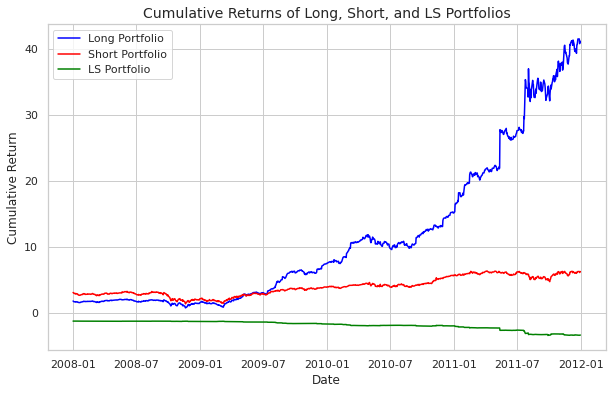

In [103]:
plot_cumulative_returns_with_metrics(combined_adjusted_returns_df)

                 Annualized Return  Annualized Volatility  Max Drawdown  \
Long Portfolio            1.190550               0.952182     -0.652012   
Short Portfolio           0.952123               1.549509     -0.588195   
LS Portfolio              0.238427               0.707196      0.000000   

                   Sharpe  
Long Portfolio   1.250339  
Short Portfolio  0.614467  
LS Portfolio     0.337144  


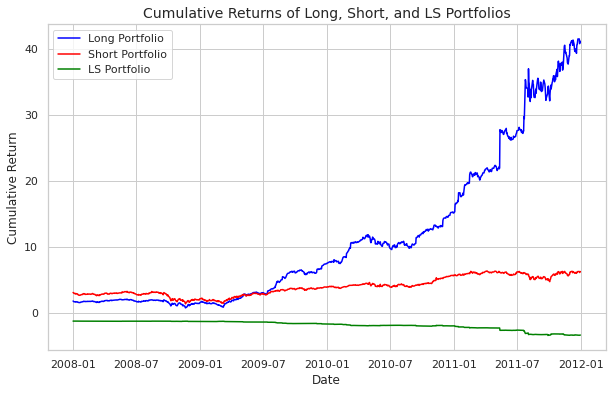

In [109]:
plot_cumulative_returns_with_metrics(combined_org_returns_df)

                 Annualized Return  Annualized Volatility  Max Drawdown  \
Long Portfolio            1.190550               0.952182     -0.652012   
Short Portfolio           0.952123               1.549509     -0.588195   
LS Portfolio              0.238427               0.707196      0.000000   

                   Sharpe  
Long Portfolio   1.250339  
Short Portfolio  0.614467  
LS Portfolio     0.337144  


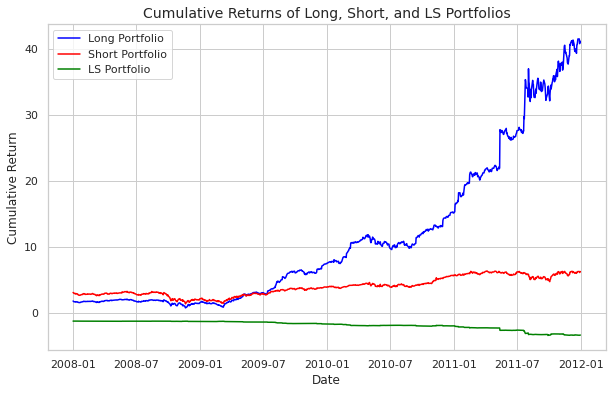

In [104]:
plot_cumulative_returns_with_metrics(combined_sent_returns_df)

In [ ]:
#create an output for analyzing alpha
pd.to_csv('')